In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [44]:
# The code was removed by Watson Studio for sharing.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [46]:
#df=pd.get_dummies(df,columns=['Status'])

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()  
df['Status'] = le.fit_transform(df['Status'])



In [48]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,1,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,2007.5,1,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,...,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,2007.5,1,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,2007.5,1,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,2007.5,1,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,...,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


In [49]:
cols=df.columns
cols

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [50]:
df.fillna(method='bfill',inplace=True)
df.isnull().any().sum()

0

In [51]:
X=df.drop(columns=['Country','Life expectancy '])
y=df['Life expectancy ']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [55]:
#training the model
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
y_pred=model.predict(X_test)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

96.43178916416716

In [58]:
model.score(X_test,y_test)

0.9643178916416716

<function matplotlib.pyplot.show(*args, **kw)>

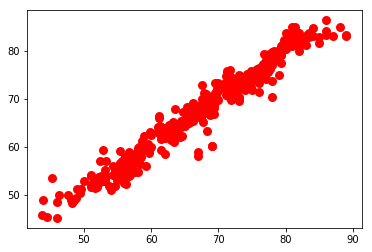

In [59]:
plt.scatter(y_test,y_pred,color='red', linewidth=3)
plt.show

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.1550340136054427
MSE: 3.094193877551021
RMSE: 1.7590320854239756


In [61]:
!pip install watson-machine-learning-client

In [62]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [63]:
# The code was removed by Watson Studio for sharing.

In [64]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [65]:
# The code was removed by Watson Studio for sharing.

In [66]:
model_artifact =client.repository.store_model(model, meta_props=model_props)

In [67]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [68]:
# The code was removed by Watson Studio for sharing.

'74cfc3c4-0e99-4f08-a895-6bf724113433'

In [69]:
# The code was removed by Watson Studio for sharing.

{"trace":"-soa6van6qvin","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


--------------------------
Deployment creation failed
--------------------------




WMLClientError: Deployment creation failed. Error: 402. {"trace":"-soa6van6qvin","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}

In [70]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [71]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/16374ddf-e1cf-4674-a505-c88033b57c24/deployments/40aeedb7-81a9-4876-8a33-416f54473b46/online'